In [57]:
import tensorflow as tf
from tensorflow.keras import regularizers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import (Dense, Conv2D, MaxPooling2D, Flatten,
                                    Dropout, BatchNormalization)
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [58]:
NUM_CLASSES = 10
RESHAPED = 784

HIDDEN_NEURONS = 256

IMG_ROWS, IMG_COLS = 28, 28
INPUT_SHAPE = (IMG_ROWS, IMG_COLS, 1)

In [59]:
fashion_data = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_data.load_data()

train_images = train_images.reshape(train_images.shape[0], IMG_ROWS, IMG_COLS, 1)
test_images = test_images.reshape(test_images.shape[0], IMG_ROWS, IMG_COLS, 1)

train_images = train_images / 255.0
test_images = test_images / 255.0

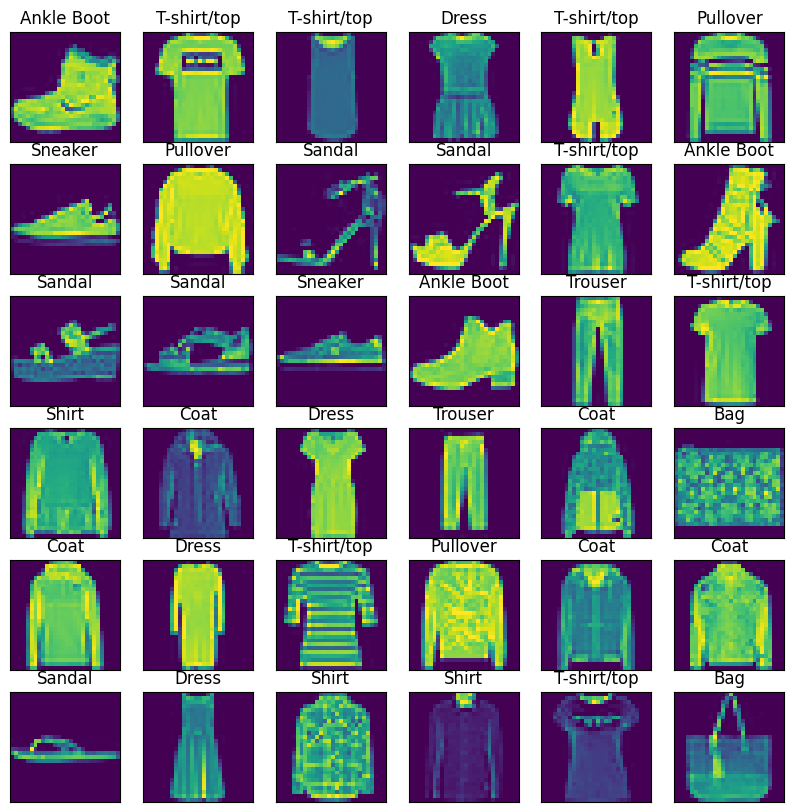

In [60]:
labels = {0: "T-shirt/top", 1: "Trouser", 2: "Pullover", 3: "Dress", 4: "Coat", 5: "Sandal", 6: "Shirt", 7: "Sneaker", 8: "Bag", 9: "Ankle Boot"}

plt.figure(figsize=(10, 10))
for i in range(36):
    plt.subplot(6, 6, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i].reshape((IMG_ROWS, IMG_COLS)))
    plt.title(labels[train_labels[i]])
plt.show()


In [61]:
# one hot encding
train_labels = tf.keras.utils.to_categorical(train_labels, NUM_CLASSES)
test_labels = tf.keras.utils.to_categorical(test_labels, NUM_CLASSES)

In [77]:
class cnn_fmnist:
  @staticmethod
  def build(input_shape, classes, use_l2_reg=False, l2_loss_lambda=0.00025):
    l2 = regularizers.l2(l2_loss_lambda) if use_l2_reg else None
    if l2 is not None:
      print("Using L2 regularization with lambda: {}".format(l2_loss_lambda))

    model = Sequential([

        # CONV => RELU => POOL
        Conv2D(32, kernel_size=(3, 3), activation='relu', padding='same',
               kernel_regularizer=l2, input_shape=input_shape),
        BatchNormalization(),
        MaxPooling2D(pool_size=(2, 2)),
        Dropout(0.15),

        # CONV => RELU => POOL
        Conv2D(64, kernel_size=(3, 3), activation='relu', padding='same',
               kernel_regularizer=l2),
        BatchNormalization(),
        MaxPooling2D(pool_size=(2, 2)),
        Dropout(0.2),

        # CONV => RELU => POOL
        Conv2D(128, kernel_size=(3, 3), activation='relu', padding='same',
               kernel_regularizer=l2),
        BatchNormalization(),
        MaxPooling2D(pool_size=(2, 2)),
        Dropout(0.3),

        Flatten(),
        Dropout(0.4),

        Dense(1024, activation='relu', kernel_regularizer=l2),
        Dropout(0.4),

        Dense(512, activation='relu', kernel_regularizer=l2),
        Dropout(0.2),

        Dense(NUM_CLASSES, activation='softmax')
    ])
    return model

In [78]:
model = cnn_fmnist.build(input_shape=INPUT_SHAPE, classes = NUM_CLASSES, use_l2_reg=True, l2_loss_lambda=0.0015)
adam = Adam(learning_rate=0.0001)
model.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])
model.summary()

Using L2 regularization with lambda: 0.0015


Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_18 (Conv2D)                   │ (None, 28, 28, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_9                │ (None, 28, 28, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_18 (MaxPooling2D)      │ (None, 14, 14, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_18 (Dropout)                 │ (None, 14, 14, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_19 (Conv2D)                   │ (None, 14, 14, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_10               │ (None, 14, 14, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_19 (MaxPooling2D)      │ (None, 7, 7, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_19 (Dropout)                 │ (None, 7, 7, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_20 (Conv2D)                   │ (None, 7, 7, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_11               │ (None, 7, 7, 128)           │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_20 (MaxPooling2D)      │ (None, 3, 3, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_20 (Dropout)                 │ (None, 3, 3, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_6 (Flatten)                  │ (None, 1152)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_21 (Dropout)                 │ (None, 1152)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_18 (Dense)                     │ (None, 1024)                │       1,180,672 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_22 (Dropout)                 │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_19 (Dense)                     │ (None, 512)                 │         524,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_23 (Dropout)                 │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_20 (Dense)                     │ (None, 10)                  │           5,130 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,804,170 (6.88 MB)

 Trainable params: 1,803,722 (6.88 MB)

 Non-trainable params: 448 (1.75 KB)

In [82]:
BATCH_SIZE = 128
EPOCHS = 25
VALIDATION_SPLIT = 0.2

In [83]:
history = model.fit(train_images, train_labels, batch_size=BATCH_SIZE, epochs=EPOCHS, validation_split=VALIDATION_SPLIT, verbose=1)

Epoch 1/25
375/375 ━━━━━━━━━━━━━━━━━━━━ 108s 289ms/step - accuracy: 0.4750 - loss: 4.5700 - val_accuracy: 0.4222 - val_loss: 4.2919
Epoch 2/25
375/375 ━━━━━━━━━━━━━━━━━━━━ 139s 281ms/step - accuracy: 0.7191 - loss: 3.4411 - val_accuracy: 0.7983 - val_loss: 3.0815
Epoch 3/25
375/375 ━━━━━━━━━━━━━━━━━━━━ 147s 296ms/step - accuracy: 0.7613 - loss: 3.1280 - val_accuracy: 0.8216 - val_loss: 2.8108
Epoch 4/25
375/375 ━━━━━━━━━━━━━━━━━━━━ 138s 284ms/step - accuracy: 0.7893 - loss: 2.8529 - val_accuracy: 0.8408 - val_loss: 2.5727
Epoch 5/25
375/375 ━━━━━━━━━━━━━━━━━━━━ 139s 277ms/step - accuracy: 0.8025 - loss: 2.6166 - val_accuracy: 0.8537 - val_loss: 2.3358
Epoch 6/25
375/375 ━━━━━━━━━━━━━━━━━━━━ 146s 287ms/step - accuracy: 0.8205 - loss: 2.3753 - val_accuracy: 0.8618 - val_loss: 2.1184
Epoch 7/25
375/375 ━━━━━━━━━━━━━━━━━━━━ 136s 271ms/step - accuracy: 0.8348 - loss: 2.1498 - val_accuracy: 0.8708 - val_loss: 1.9121
Epoch 8/25
375/375 ━━━━━━━━━━━━━━━━━━━━ 147s 285ms/step - accuracy: 0.8427 -

In [69]:
score = model.evaluate(test_images, test_labels)
print('Test score: ', score[0])
print('Test accuracy: ', score[1])

313/313 ━━━━━━━━━━━━━━━━━━━━ 7s 22ms/step - accuracy: 0.8846 - loss: 1.4127
Test score:  1.4183086156845093
Test accuracy:  0.878600001335144


Text(0.5, 1.0, 'Training - Accuracy')

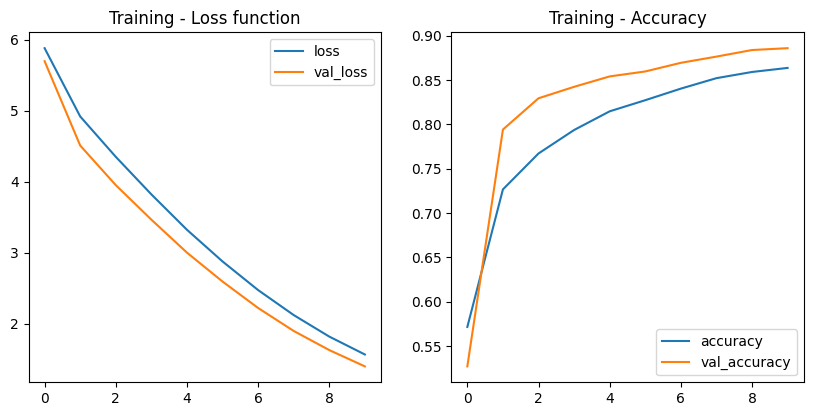

In [71]:
plt.figure(figsize=(10, 10))

plt.subplot(2, 2, 1)
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.legend()
plt.title('Training - Loss function')

plt.subplot(2, 2, 2)
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.legend()
plt.title('Training - Accuracy')

In [74]:
predicted_classes = np.around(model.predict(test_images))
predicted_classes = np.argmax(model.predict(test_images), axis=1)

test_labels = np.argmax(test_labels, axis=1)

correct_indices = np.nonzero(predicted_classes == test_labels)[0]
incorrect_indices = np.nonzero(predicted_classes != test_labels)[0]

313/313 ━━━━━━━━━━━━━━━━━━━━ 7s 21ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 19ms/step


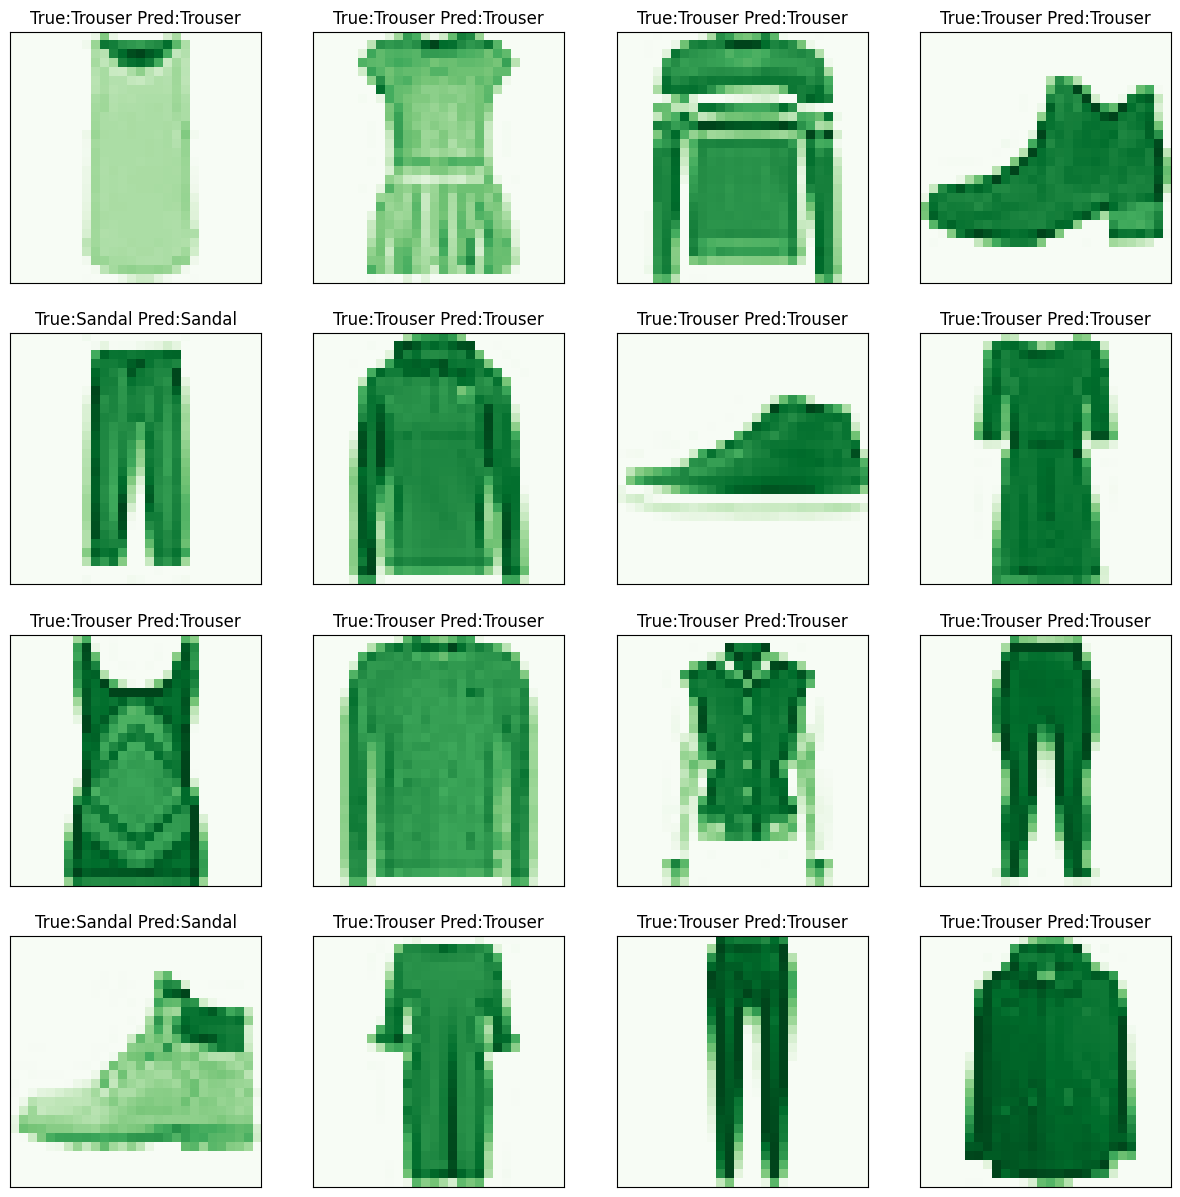

In [75]:
# plot 16 correctly predicted images and their labels

plt.figure(figsize=(15, 15))
for i, indx in enumerate(correct_indices[:16]):
    plt.subplot(4, 4, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[indx].reshape((IMG_ROWS, IMG_COLS)), cmap="Greens")
    label_index = train_labels[indx]
    plt.title("True:{} Pred:{}".format(labels[test_labels[indx]], labels[predicted_classes[indx]]))
plt.show()

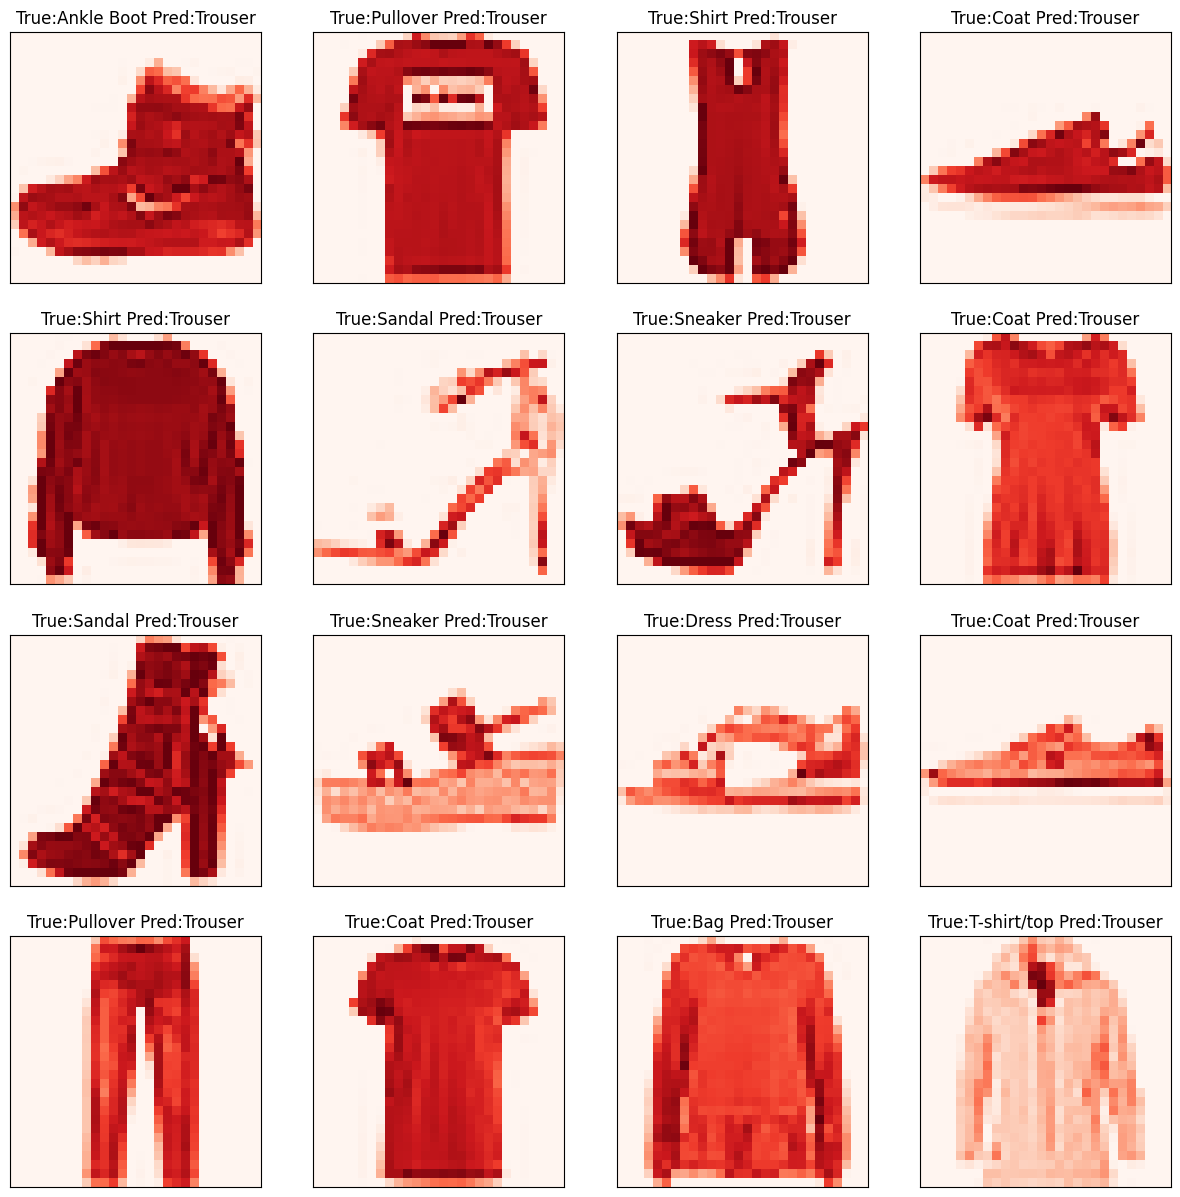

In [76]:
# plot 16 incorrectly predicted images and their labels

plt.figure(figsize=(15, 15))
for i, indx in enumerate(incorrect_indices[:16]):
    plt.subplot(4, 4, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[indx].reshape((IMG_ROWS, IMG_COLS)), cmap="Reds")
    label_index = train_labels[indx]
    plt.title("True:{} Pred:{}".format(labels[test_labels[indx]], labels[predicted_classes[indx]]))
plt.show()